# Inferential Statistics
Membuat inferensi, statement, berdasarkan data, dengan menggunakan statistics

# Terminologi
## Random Variable
- angka numerik hasil dari sebuah kejadian random (misal buang dadu, nunggu bus, berat badan orang, dll...)
    - 2 tipe: Discrete dan Continuous
    
## Discrete Random Variable
saat random variable tersebut hasil numerik nya integer, angka bulat, contohnya seperti buang dadu (1,2,3,4,5,6)

Distribusi datanya kita buat jadi Probability Mass Function

## Continuous Random Variable
saat random variable tersebut hasil numeriknya terus berjalan (panjang, waktu, berat, dll..). continuous random selalu kita ukur dalam bentuk range, misalnya yang berat badan antara 10-20kg, antara 20-30kg,...

contohnya seperti berat badan 25kg 25.001kg 25.2kg semua berbeda, kita tidak bisa kategorikan data kita ke 1 angka bulat, kita tidak bisa bilang dari 10 orang, ada berapa yang di 50kg --> pasti 0

Distribusi datanya kita buat jadi Probability Density Function

## Probability Distribution
- mapping random variable bisa apa saja, dan untuk setiap hasil kemungkinan dapet angka tersebut berapa

## Tipe Probability Distribution
- Uniform Distribution

# Teknik
- Confidence Interval
- Hypothesis Testing

In [53]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# package untuk membuat distribution
from scipy.stats import uniform, norm, binom, bernoulli

# numpy dan pandas
import numpy as np
import pandas as pd

# untuk Confidence Interval
import statsmodels.api as sm
import scipy.stats as stats
import random
import warnings

# untuk hypothesis testing
import scipy.stats.distributions as dist

### Uniform Distribution

In [2]:
from scipy.stats import uniform

In [3]:
# bikin dummy data untuk tipe data yang continuous random variable
# contoh, kita buat 10000 titik data yang random antara 0-30
n = 10000
start = 0
width = 30
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

In [4]:
data_uniform

array([22.8564791 , 28.06123531, 24.05368694, ..., 23.82703089,
       13.39131322, 24.2487335 ])

<AxesSubplot:ylabel='Count'>

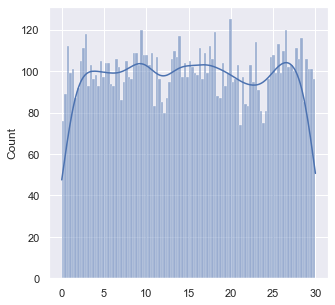

In [5]:
# gunakan plot histogram untuk memvisualisasikan distribusi data nya
sns.histplot(data_uniform, bins=100, kde=True)

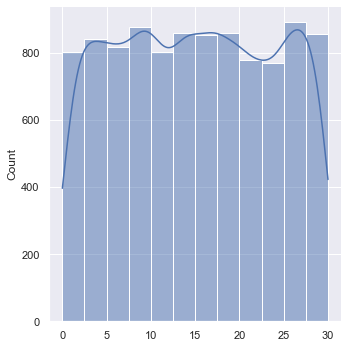

In [6]:
# contoh kita edit jumlah bin biar pas sama axis, disini kalian bisa lihat
# kalau data kita menujukkan range random varible nya (0-2.5, lalu 2.5-5, dst...)
# dari 10rb titik data, berapa kali masuk setiap range
sns.displot(data_uniform, bins=12, kde=True)

### Normal Distribution

In [7]:
from scipy.stats import norm

In [8]:
# buat dummy data untuk normal distribution
# standard normal distribution punya mean 0 dan std 1
n = 10000
mean = 0
std = 1
data_normal = norm.rvs(size=n, loc=mean, scale=std)

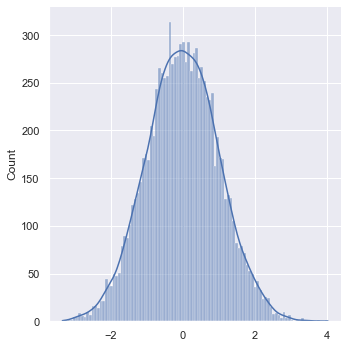

In [9]:
# bikin graph distribusi data normal
sns.displot(data_normal, bins=100, kde=True)

<AxesSubplot:ylabel='Count'>

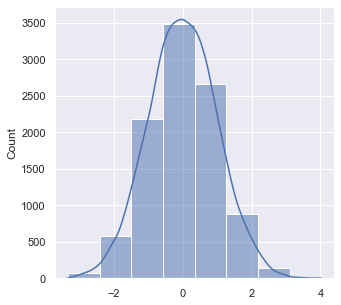

In [10]:
sns.histplot(data_normal, bins=8, kde=True)

<AxesSubplot:ylabel='Count'>

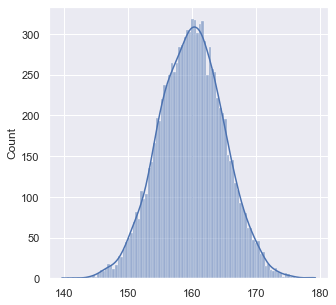

In [11]:
# contoh buat dummy data yang ada rata-rata 160, std 5
n = 10000
mean = 160
std = 5
data_normal = norm.rvs(size=n, loc=mean, scale=std)

sns.histplot(data_normal, bins=100, kde=True)

### Binomial Distribution

In [12]:
from scipy.stats import binom

<AxesSubplot:ylabel='Count'>

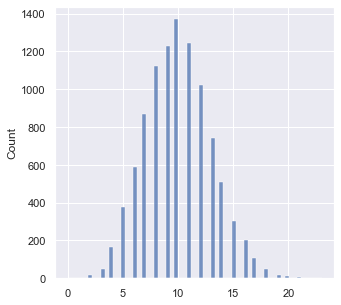

In [13]:
# buat dummy data tipe binomial distribution
# satu orang berapa kali coba, n
# kemungkinan menang berapa, p
# berapa orang yang coba, size
data_binom = binom.rvs(n=100, p=0.1, size=10000)

sns.histplot(data_binom)

### Bernoulli Distribution
Binomial distribution saat setiap orang 1 kali coba saja

<AxesSubplot:ylabel='Count'>

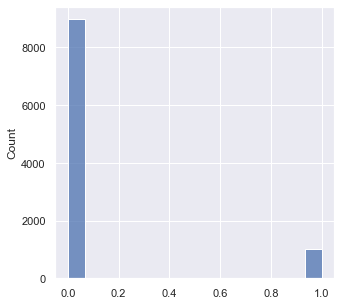

In [14]:
data_binom = binom.rvs(n=1, p=0.1, size=10000)

sns.histplot(data_binom)

<AxesSubplot:ylabel='Count'>

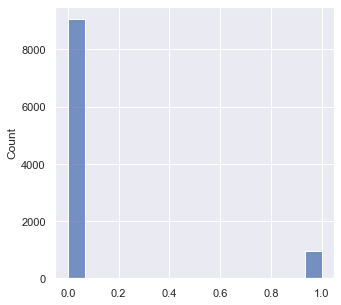

In [15]:
from scipy.stats import bernoulli

data_bernoulli = bernoulli.rvs(p=0.1, size=10000)

sns.histplot(data_bernoulli)

# Confidence Interval

cara hitung nya adalah dari titik tengah estimasi +- margin error.
- Best estimate +- Margin Error
- Best estimate = mean atau % population proportion
- Margin Error = z score * Standard Error
- z score = dari tingkat keyakinan:
    - yakin 75%,   z = 1.15
    - yakin 90%,   z = 1.64
    - yakin 95%,   z = 1.96
    - yakin 97%,   z = 2.17
    - yakin 99%,   z = 2.57
    - yakin 99.9%, z = 3.29
- Standard Error:
    - kalau best estimate menggunakan mean, standard error = standard deviation / np.sqrt(jumlah_data)
    - kalau best estimate menggunakan % population proportion p, standard error = np.sqrt(p * (1-p) / jumlah_data )

In [16]:
import numpy as np
import pandas as pd

In [17]:
# import data heart.csv
df = pd.read_csv('dataset/Heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Case Study 1: Confidence Interval untuk Proportion
dari data Heart.csv, buat Confidence Interval untuk persentasi populasi wanita yang punya sakit jantung. Berapa % wanita punya sakit jantung? berikan dalam bentuk interval.

kolom sex: (1 = pria; 0 = wanita)   
kolom target: (0 = sehat; 1 = sakit)

In [18]:
# tambahin kolom baru gender
df['gender'] = df['sex'].replace({1:'Pria', 0:'Wanita'})
# tambahin kolom baru status
df['status'] = df['target'].replace({0:'Sehat', 1:'Sakit'})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,status
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Pria,Sehat
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Pria,Sehat
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Pria,Sehat
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Pria,Sehat
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Wanita,Sehat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,Pria,Sakit
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Pria,Sehat
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Pria,Sehat
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Wanita,Sakit


In [19]:
# pandas crosstab
pd.crosstab(df['status'], df['gender'])

gender,Pria,Wanita
status,,
Sakit,300,226
Sehat,413,86


In [20]:
# Berapa % wanita punya sakit jantung?
# Best estimate +- Margin Error
wanita_sakit = 226
wanita_sehat = 86
total_wanita = wanita_sakit + wanita_sehat
be = wanita_sakit / total_wanita

z = 1.96 # pilih yakin 95%

p = be
jumlah_data = total_wanita
se = np.sqrt(p * (1-p) / jumlah_data )

me = z * se

ci_low = be - me
ci_high = be + me

print(ci_low, ci_high)

0.6747765651256307 0.773941383592318


67 - 77% populasi wanita menderita sakit jantung. tingkat keyakinan kita ada di 95%, dari data Heart.csv.

In [21]:
# bisa juga kita hitung menggunakan package statsmodels api
import statsmodels.api as sm

sm.stats.proportion_confint(jumlah_data * p, jumlah_data)

(0.6747774762140357, 0.773940472503913)

### Case Study 2: Confidence Interval untuk Mean
menggunakan data Heart.csv, hitung confidence interval untuk tingkat kolesterol pria dan wanita.

In [22]:
# kita siapkan data mean dan standard deviation cholesterol
# untuk masing masing gender. sekalian juga jumlah data ada brp.
df.groupby('gender').agg({'chol': [np.mean, np.std, np.size]})

chol                
              mean        std size
gender                            
Pria    239.237027  43.155535  713
Wanita  261.455128  64.466781  312

In [23]:
# cari Mean chol Pria, Wanita
be_p = 239.237027
be_w = 261.455128

z = 1.96

se_p = 43.155535 / np.sqrt(713)
me_p = z * se_p
se_w = 64.466781 / np.sqrt(312)
me_w = z * se_w

ci_high_p = be_p + me_p
ci_low_p = be_p - me_p
ci_high_w = be_w + me_w
ci_low_w = be_w - me_w

print("Pria", ci_low_p, ci_high_p)
print("Wanita", ci_low_w, ci_high_w)

Pria 236.0692995254539 242.4047544745461
Wanita 254.30169095203016 268.6085650479699


Tingkat kolesterol pria ada di antara 236-242. Tingkat kolesterol wanita ada di antara 254-269

## Case Study 3: Confidence Interval

In [24]:
import scipy.stats as stats
import random
import warnings
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [25]:
# kita bikin dummy data berat badan pria dan wanita
# menggunakan normal distribution
np.random.seed(42) # biar sama dengan contoh
normal_berat_pria = np.random.normal(loc=181, scale=24, size=6000)
normal_berat_wanita=np.random.normal(loc=132, scale=22, size=6500)

# gabung 2 set data jadi 1
berat_org = np.concatenate((normal_berat_pria, normal_berat_wanita), 
                           axis=0)

# ubah tipe data jadi DataFrame
df_berat = pd.DataFrame(data={"Berat":berat_org})
df_berat.head()

,Berat
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


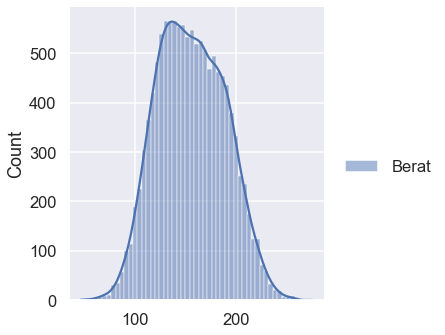

In [26]:
# lihat distribusi datanya
sns.displot(df_berat, kde=True)

datanya tidak berbentuk normal distribution (karena 2 normal distribution kita gabung) jadi banyak teknik statistik yang tidak bisa kita terapkan. Untuk itu, kita ubah dulu datanya jadi bentuk normal. Caranya dengan resampling.

Kita ambil sampel 300 kali, 1 sampel isi 25 titik data dari semua data ini.

In [27]:
# untuk setiap sample, kita hitung dan simpan rata2 berat badan
sample_means = []
n = 25
for sample in range(0,300):
    sample_values = np.random.choice(a=df_berat['Berat'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

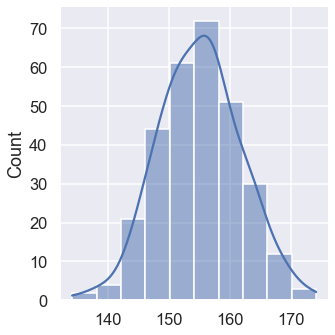

In [28]:
# kita bisa lihat bentuk distribusi data sample_means
sns.displot(sample_means, bins=10, kde=True)

In [29]:
# kita bisa hitung median, mean, std dari 300 sample_means
smed = np.median(sample_means)
smean = np.mean(sample_means)
sstd = np.std(sample_means)

print(smed, smean, sstd)

155.3008268518431 155.12418330193915 6.734407481483423


In [30]:
# mau cari Confidence Interval dari Mean, kita perlu SE dan Z
# std yang digunakan diambil dari data sebelum resampling
se = df_berat['Berat'].std() / np.sqrt(n)
se

6.717038176791725

In [31]:
# pakai z = 1.96 untuk 95% tingkat keyakinan
z = 1.96

In [32]:
se = z * se

be = smean # mean of sample means

ci_high = be + se
ci_low = be - se

print(ci_low, ci_high)

141.95878847542738 168.28957812845093


# Hypothesis Testing
1. ada hipotesa/ asumsi/ statement yang kita tidak tau benar/tidak
2. Test statement nya = hypothesis testing
    - buat null hypothesis - fakta yang diterima
    - tes untuk REJECT atau tidak bisa reject null hypothesis

percaya bahwa kalau terapi 2 kali seminggu (bukan 3 kali) maka masa pemulihan akan lebih lama dari 8.2 minggu

H1: μ> 8.2

kita buat null hypothesis nya

fakta yang diterima adalah terapi mau 2 kali seminggu maka masa pemulihan sama atau lebih cepat dibandingkan 3 kali seminggu

H0: μ<=8.2

pilih tingkat keyakinan, untuk yakin 95%, alpha = 5% atau 0.05

hypothesis testing ==> dapat p-value
- jika p-value <= alpha, REJECT null hypothesis, ada perbedaan signifikan antara μ dengan 8.2
- jika p-value > alpha, tidak bisa reject null hypothesis, tidak ada perbedaan signifikan antara μ dengan 8.2

# One Population Proportion
dulu 52% ortu percaya x, apakah sekarang lebih banyak ortu yang percaya x

populasi: ortu   

H1: p > 0.52

H0: p <= 0.52

data:
- n = 1018
- p = 56%

In [33]:
# pakai proportions_ztest() dari statsmodels
pnull = 0.52
phat = 0.56
n = 1018

sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')

(2.571067795759113, 0.005069273865860533)

In [34]:
pvalue = 0.005069273865860533

In [35]:
# tingkat yakin 95%, berarti alpha = 5%
alpha = 0.05

if (pvalue < alpha):
    print("Reject null hypothesis")
else:
    print("tidak bisa reject null hypothesis")

Reject null hypothesis


kemungkinan besar (95% yakin) sekarang lebih banyak ortu yang percaya x

*note: kita tidak menerima alternat hypothesis, kita hanya reject null hypothesis. 

# Difference in Population Means
membandingkan dua populasi, apakah ada perbedaan antara nilai dua populasi ini?

contoh: apakah rata-rata body mass index pria dan wanita berbeda?

H1: bp != bw

H0: bp == bw

data wanita:
- 2976 wanita
- rata2 bw = 29.94
- std = 7.75   

data pria:
- 2759 pria
- rata2 bp = 28.78
- std = 6.25   


kolom RIAGENDR: (1 = pria; 2 = wanita)

In [36]:
# import data nhanes nya
df = pd.read_csv('dataset/nhanes.csv')
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [37]:
df_pria = df[df['RIAGENDR'] == 1]
df_wanita = df[df['RIAGENDR'] == 2]

In [38]:
# dapatkan n, mean, std masing-masing
n_p = len(df_pria)
m_p = df_pria['BMXBMI'].mean()
s_p = df_pria['BMXBMI'].std()

n_w = len(df_wanita)
m_w = df_wanita['BMXBMI'].mean()
s_w = df_wanita['BMXBMI'].std()

print("pria",n_p,m_p,s_p)
print("wanita",n_w,m_w,s_w)

pria 2759 28.778072111846985 6.252567616801485
wanita 2976 29.939945652173996 7.75331880954568


In [39]:
# pakai sm.stats.ztest untuk Difference in Population Means

bmi_wanita = df_wanita['BMXBMI'].dropna()
bmi_pria = df_pria['BMXBMI'].dropna()

zscore, pvalue = sm.stats.ztest(bmi_wanita, bmi_pria, alternative='two-sided')

print(pvalue)

6.591544431126401e-10


In [40]:
# pilih tingkat keyakinan, 95%, alpha = 0.05
alpha = 0.05

if (pvalue < alpha):
    print("Reject null hypothesis")
else:
    print("tidak bisa reject null hypothesis")

Reject null hypothesis


kemungkinan besar rata-rata bmi pria dan wanita berbeda

# Hypothesis Testing untuk One Proportion
kita gunakan dataset Heart.csv yang tadi, pura pura ini adalah data pasien sakit jantung dari US.

proportion orang Ireland yang punya sakit jantung adalah 42%

Apakah lebih banyak orang US yang sakit jantung dibandingkan orang Ireland?

H1: p > 0.42

H0: p <=0.42



In [49]:
# import ulang data heart.csv
df = pd.read_csv('dataset/Heart.csv')

# hitung proportion orang US yang punya sakit jantung
n = len(df) # total berapa orang US
sakit = len(df[df['target'] == 1]) # total orang USyang sakit
p_us = sakit / n

print(p_us)

0.5131707317073171


cek apakah perbedaan signifikan

cari test statistic   
rumus: (be - he) / se   
se = np.sqrt(p * (1-p) / jumlah_data)

In [51]:
be = p_us
he = 0.42

se = np.sqrt(he * (1-he) / n)

test_stat = (be - he) / se
print(test_stat)

6.04369858636477


In [54]:
# calculate p-value
import scipy.stats.distributions as dist
pvalue = 2 * dist.norm.cdf(-np.abs(test_stat))
print(pvalue)

1.5062078087269162e-09


In [55]:
# pilih tingkat keyakinan, 95%, alpha = 0.05
alpha = 0.05

if (pvalue < alpha):
    print("Reject null hypothesis")
else:
    print("tidak bisa reject null hypothesis")

Reject null hypothesis


kita bisa reject null hypothesis (H0: p <=0.42) proporsi orang US yang sakit jantung ada <= proporsi orang Irlandia yang sakit jantung.

kemungkinan besar proporsi orang US yang sakit jantung lebih banyak dibanding orang Irlandia